## **NLP - Análisis de Sentimientos: Trump Banned from Twitter**

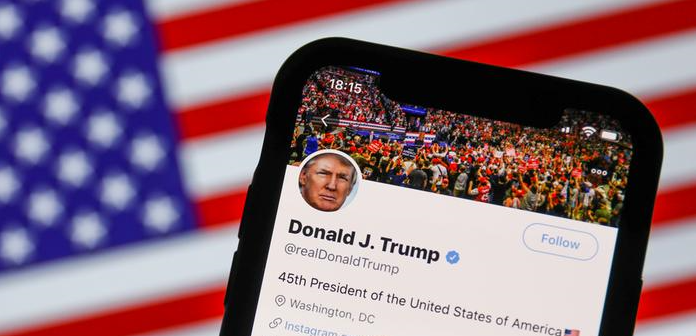

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx
from textblob import TextBlob

%matplotlib inline

### **1. Importación de datos (tweets)**

In [2]:
data = pd.read_csv('tweets-trump-c.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                5792 non-null   object 
 1   lang                5792 non-null   object 
 2   user-location       4765 non-null   object 
 3   place-country       5792 non-null   object 
 4   place-country_code  5792 non-null   object 
 5   user-screen_name    5792 non-null   object 
 6   Lat                 5792 non-null   float64
 7   Lon                 5792 non-null   float64
 8   lang_txt            5792 non-null   object 
 9   text_en             5792 non-null   object 
 10  text_cleaned        5777 non-null   object 
dtypes: float64(2), object(9)
memory usage: 497.9+ KB


In [4]:
# Mantenemos en el df los tweets sin NA en la columna text_cleaned
data = data[data['text_cleaned'].notna()]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5777 entries, 0 to 5791
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                5777 non-null   object 
 1   lang                5777 non-null   object 
 2   user-location       4756 non-null   object 
 3   place-country       5777 non-null   object 
 4   place-country_code  5777 non-null   object 
 5   user-screen_name    5777 non-null   object 
 6   Lat                 5777 non-null   float64
 7   Lon                 5777 non-null   float64
 8   lang_txt            5777 non-null   object 
 9   text_en             5777 non-null   object 
 10  text_cleaned        5777 non-null   object 
dtypes: float64(2), object(9)
memory usage: 541.6+ KB


In [6]:
data.head()

,text,lang,user-location,place-country,place-country_code,user-screen_name,Lat,Lon,lang_txt,text_en,text_cleaned
0,Trump foi banido do Facebook!\nParabens Facebo...,pt,Brasil,Brazil,BR,psipauloalmeida,-19.918692,-43.959823,Portuguese,Trump has been banned from Facebook!\nCongratu...,trump have be ban from facebookcongratulation ...
1,Coup attempt fallout: #trumpBanned #Trumpcenso...,en,"Queens, NY",United States,US,BCNewsy,40.670880,-73.831187,English,Coup attempt fallout: #trumpBanned #Trumpcenso...,coup attempt fallout trumpbanne trumpcensore t...
2,#TrumpBanned \nTrump banido do Facebook indefi...,pt,Brasil,Brazil,BR,psipauloalmeida,-19.918692,-43.959823,Portuguese,# TrumpBanned\nTrump banned from Facebook inde...,trumpbannedtrump ban from facebook indefinitely
3,Mark Zuckerberg bans @realDonaldTrump from Fac...,en,"Palm Beach, FL",United States,US,wpbf_todd,26.533486,-80.112903,English,Mark Zuckerberg bans @realDonaldTrump from Fac...,mark zuckerberg ban realdonaldtrump from faceb...
4,@Facebook doing the least.\nBanning Cheeto two...,en,"Eswatini, Azania, Terra",Swaziland,SZ,thesuku,-26.517679,31.462823,English,@Facebook doing the least.\nBanning Cheeto two...,facebook do the leastbanne cheeto two week bef...


### **2. Análisis de Sentimientos**

Se puede utilizar textblob del paquete Python para calcular los valores de polaridad de los tweets individuales.
* Empezamos creando objetos textblob, que asignan valores de polaridad a los tweets.
* Luego se identifica el valor de polaridad utilizando el atributo .polarity del objeto texblob.

In [7]:
# definimos una funcion para analizar los sentimientos en cada texto del tweet
def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

La forma en que funciona es que textblob ya proporciona un analizador entrenado (mucho más facil). **Textblob** puede trabajar con diferentes modelos de aprendizaje automático utilizados en el procesamiento del lenguaje natural. De todos modos, volviendo al código, solo agregaremos una columna adicional a nuestros datos. Esta columna contendrá el análisis de sentimiento y podemos trazar el dataframe para ver la actualización:

In [8]:
# Creamos una columna con el resultado del análisis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['text_cleaned'] ])

data.head()

,text,lang,user-location,place-country,place-country_code,user-screen_name,Lat,Lon,lang_txt,text_en,text_cleaned,SA
0,Trump foi banido do Facebook!\nParabens Facebo...,pt,Brasil,Brazil,BR,psipauloalmeida,-19.918692,-43.959823,Portuguese,Trump has been banned from Facebook!\nCongratu...,trump have be ban from facebookcongratulation ...,0
1,Coup attempt fallout: #trumpBanned #Trumpcenso...,en,"Queens, NY",United States,US,BCNewsy,40.670880,-73.831187,English,Coup attempt fallout: #trumpBanned #Trumpcenso...,coup attempt fallout trumpbanne trumpcensore t...,0
2,#TrumpBanned \nTrump banido do Facebook indefi...,pt,Brasil,Brazil,BR,psipauloalmeida,-19.918692,-43.959823,Portuguese,# TrumpBanned\nTrump banned from Facebook inde...,trumpbannedtrump ban from facebook indefinitely,0
3,Mark Zuckerberg bans @realDonaldTrump from Fac...,en,"Palm Beach, FL",United States,US,wpbf_todd,26.533486,-80.112903,English,Mark Zuckerberg bans @realDonaldTrump from Fac...,mark zuckerberg ban realdonaldtrump from faceb...,0
4,@Facebook doing the least.\nBanning Cheeto two...,en,"Eswatini, Azania, Terra",Swaziland,SZ,thesuku,-26.517679,31.462823,English,@Facebook doing the least.\nBanning Cheeto two...,facebook do the leastbanne cheeto two week bef...,0


In [9]:
# Cree un df que contenga el valor de polaridad y el texto del tweet
sentiment_df = data[['text_cleaned', 'SA']]

sentiment_df.head(15)

,text_cleaned,SA
0,trump have be ban from facebookcongratulation ...,0
1,coup attempt fallout trumpbanne trumpcensore t...,0
2,trumpbannedtrump ban from facebook indefinitely,0
3,mark zuckerberg ban realdonaldtrump from faceb...,0
4,facebook do the leastbanne cheeto two week bef...,0
5,so donaldtrump have be ban from facebook indef...,1
6,tromb be a dictator under the skin this be bal...,0
7,twitter tonight be like when scream child fina...,0
8,base on trump time see over the past year a ho...,-1
9,ohhhhh spot on trumpisacompletefailure trumpbanne,0


**Análisis de los resultados**

Para tener una forma sencilla de verificar los resultados, contaremos el número de tweets neutrales, positivos y negativos y extraeremos los porcentajes.

In [10]:
pos = len(sentiment_df[sentiment_df['SA'] > 0]. value_counts())
neu = len(sentiment_df[sentiment_df['SA'] == 0]. value_counts())
neg = len(sentiment_df[sentiment_df['SA'] < 0]. value_counts())
tot =  pos+neu+neg
#print (pos, neu, neg, pos+neu+neg)

Imprimimos los porcentajes:

In [11]:
# Visualizamos los %:

print("Porcentaje de tweets positivos : {}%".format(round(pos/tot*100,2)))
print("Porcentaje de tweets neutrales : {}%".format(round(neu/tot*100,2)))
print("Porcentaje de tweets negativos : {}%".format(round(neg/tot*100,2)))

Porcentaje de tweets positivos : 26.04%
Porcentaje de tweets neutrales : 56.45%
Porcentaje de tweets negativos : 17.51%


Estos valores de polaridad se pueden trazar en un histograma, lo que puede ayudar a resaltar el sentimiento general (es decir, más positividad o negatividad) hacia el sujeto.

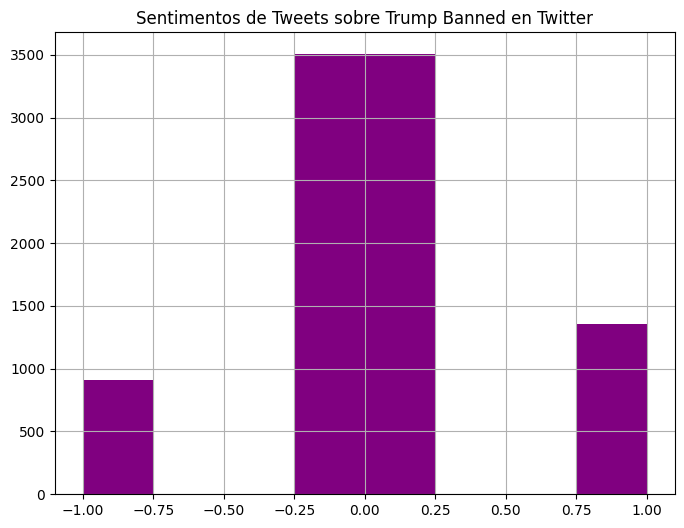

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentimentos de Tweets sobre Trump Banned en Twitter")
plt.show()

### **3. Nube de Palabras (WordCloud)**

In [13]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
text = " ".join(tweet for tweet in sentiment_df['text_cleaned'])
print ("Existen {} palabras al combinar todos los tweets limpios.".format(len(text)))

Existen 415826 palabras al combinar todos los tweets limpios.


In [15]:
stopwords = set(STOPWORDS)
# Eliminaremos las palabras de coleccon
stopwords.update(["trump", "trumpbanned", "wearetrump", "realdonaldtrump"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="GhostWhite", width=800, height=800, margin=2,collocations=False,
                      font_step=2).generate(text)

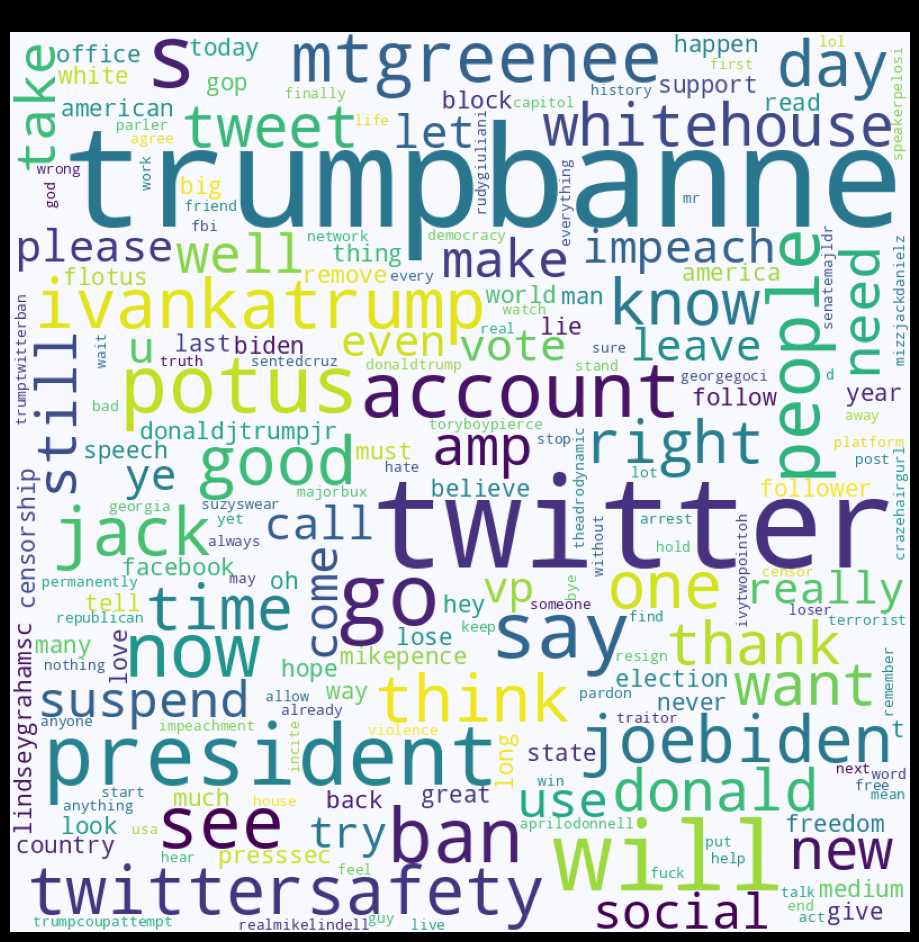

In [16]:
plt.figure(figsize=(16,9), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud (Nube de Palabras) sobre Trump Banned en Twitter")
plt.show()

### **4. Ubicación de los tweets en un mapa**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio

fig = px.scatter_geo(data, lat='Lat', lon='Lon',
                     color='place-country', #size='New cases', size_max=20,
                     hover_name='user-screen_name',
                     hover_data=[ 'text_cleaned',  'place-country',
                                 'user-location'], template='seaborn')

fig.update_layout(
    title_text = "Subconjunto de tweets con ubicación exacta",

    geo=dict(showframe=False, showcoastlines=False,
             projection_type='equirectangular'),

    annotations = [dict(x=-0.04, y=0.95, xref='paper', yref='paper',
        text='Del total de tweets, solo el ~ 7% incluye ' \
                'la ubicación exacta. Esta proporción se mantiene siempre.', showarrow = False)]
)

fig.update_geos(resolution=110, showcountries=True,
                lataxis_range=[-55, 90], lonaxis_range=[-180, 180])
fig.show()